Optimal Position: [0.9999999  0.99999991]
Optimal Value: 2.0341485432608092e-14


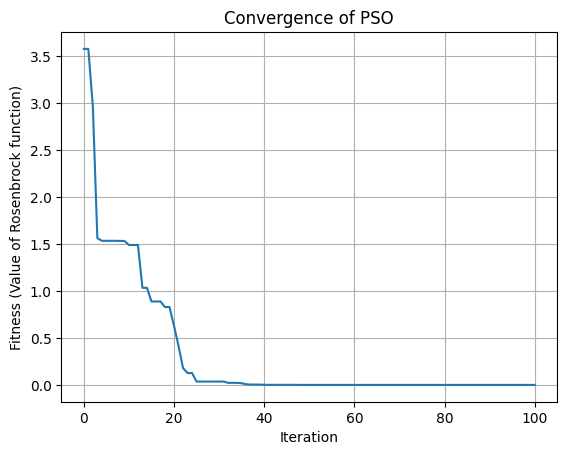

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define the Rosenbrock Function
def rosenbrock(x, y):
    """
    The Rosenbrock function, a common optimization test function.
    Has a global minimum of 0 at (a, a^2). Typically a=1, so minimum is at (1, 1).
    """
    a = 1
    b = 100
    return (a - x)**2 + b * (y - x**2)**2

# Particle Swarm Optimization (PSO) Algorithm
class PSO:
    def __init__(self, num_particles, max_iter, w, c1, c2, bounds):
        """
        Initializes the PSO algorithm.

        Args:
            num_particles (int): The number of particles in the swarm.
            max_iter (int): The maximum number of iterations.
            w (float): Inertia weight.
            c1 (float): Cognitive coefficient (influence of personal best).
            c2 (float): Social coefficient (influence of global best).
            bounds (tuple): A tuple of tuples defining the search space bounds (e.g., ((-5, 5), (-5, 5))).
                           Assuming 2D optimization (x, y).
        """
        self.num_particles = num_particles
        self.max_iter = max_iter
        self.w = w  # Inertia weight
        self.c1 = c1 # Cognitive coefficient
        self.c2 = c2 # Social coefficient
        self.bounds = bounds # Search bounds for x and y
        self.dimensions = len(bounds) # Assuming dimensions based on bounds

        # Initialize particles (positions and velocities)
        # Positions are initialized randomly within the search bounds
        self.positions = np.random.uniform(low=[b[0] for b in self.bounds],
                                           high=[b[1] for b in self.bounds],
                                           size=(self.num_particles, self.dimensions))

        # Velocities are typically initialized randomly within a certain range, e.g., [-1, 1]
        self.velocities = np.random.uniform(-1, 1, size=(self.num_particles, self.dimensions))

        # Initialize personal best positions and values
        self.pbest_positions = np.copy(self.positions)
        # Evaluate the initial fitness of each particle's position
        self.pbest_values = np.array([rosenbrock(p[0], p[1]) for p in self.positions])

        # Initialize global best position and value
        # Find the index of the particle with the best initial fitness
        gbest_index = np.argmin(self.pbest_values)
        self.gbest_position = np.copy(self.pbest_positions[gbest_index])
        self.gbest_value = self.pbest_values[gbest_index]

    def update_velocity(self, i):
        """
        Updates the velocity of the i-th particle based on the PSO velocity update formula.
        """
        r1, r2 = np.random.rand(2) # Random numbers for cognitive and social components

        # PSO Velocity Update Formula:
        # v(t+1) = w*v(t) + c1*r1*(pbest(i) - x(t)) + c2*r2*(gbest - x(t))
        cognitive_component = self.c1 * r1 * (self.pbest_positions[i] - self.positions[i])
        social_component = self.c2 * r2 * (self.gbest_position - self.positions[i])

        self.velocities[i] = self.w * self.velocities[i] + cognitive_component + social_component

    def update_position(self, i):
        """
        Updates the position of the i-th particle based on its velocity.
        Ensures the particle stays within the search bounds.
        """
        self.positions[i] += self.velocities[i]

        # Ensure particles stay within bounds using clipping
        for d in range(self.dimensions):
            self.positions[i, d] = np.clip(self.positions[i, d], self.bounds[d][0], self.bounds[d][1])

    def optimize(self):
        """
        Runs the main PSO optimization loop.
        """
        # Keep track of the global best value over iterations for plotting convergence
        history = [self.gbest_value]

        for iteration in range(self.max_iter):
            for i in range(self.num_particles):
                # Evaluate the fitness of the current position
                current_fitness = rosenbrock(self.positions[i, 0], self.positions[i, 1])

                # Update personal best
                if current_fitness < self.pbest_values[i]:
                    self.pbest_values[i] = current_fitness
                    self.pbest_positions[i] = self.positions[i]

                # Update global best
                if current_fitness < self.gbest_value:
                    self.gbest_value = current_fitness
                    self.gbest_position = self.positions[i]

                # Update velocity and position
                self.update_velocity(i)
                self.update_position(i)

            # Record the global best value for this iteration
            history.append(self.gbest_value)
            # Optional: Print progress
            # if (iteration + 1) % 50 == 0 or iteration == 0:
            #     print(f"Iteration {iteration+1}: Best Value = {self.gbest_value:.4f}")


        return self.gbest_position, self.gbest_value, history # Return best position, value, and history

# # Parameters
num_particles = 30
max_iter = 100
w = 0.5  # Inertia weight
c1 = 1.5 # Cognitive coefficient
c2 = 1.5 # Social coefficient
bounds = ((-5, 5), (-5, 5)) # Search space bounds for x and y

# Run PSO
pso = PSO(num_particles, max_iter, w, c1, c2, bounds)
best_position, best_value, history = pso.optimize()

# Output the result
print(f"Optimal Position: {best_position}")
print(f"Optimal Value: {best_value}")

# Plotting the convergence
plt.plot(range(len(history)), history)
plt.xlabel('Iteration')
plt.ylabel('Fitness (Value of Rosenbrock function)')
plt.title('Convergence of PSO')
plt.grid(True)
plt.show()